In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option('display.max_columns', None)

In [5]:
#load the data set
df = pd.read_csv("file path")  
# adjust path if needed

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.shape

(53940, 10)

In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [13]:
#Check for missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [14]:
#Data Cleaning

In [17]:
#Identify Rows with Invalid Dimensions
#A diamond cannot have zero dimensions(These are invalid values, not missing values-x,y,z=0)
(df[['x', 'y', 'z']] == 0).sum()

x     8
y     7
z    20
dtype: int64

In [19]:
#how many rows are affected:
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)].shape

(20, 10)

In [21]:
#Remove Invalid Rows
df_clean = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

In [22]:
df_clean.shape

(53920, 10)

In [23]:
#Reset Index
df_clean.reset_index(drop=True, inplace=True)

In [24]:
#Verify Cleaning Worked
(df_clean[['x', 'y', 'z']] == 0).sum()

x    0
y    0
z    0
dtype: int64

In [25]:
df_clean.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [26]:
#Outlier Detection & Handling

In [27]:
#Select Numerical Columns
num_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

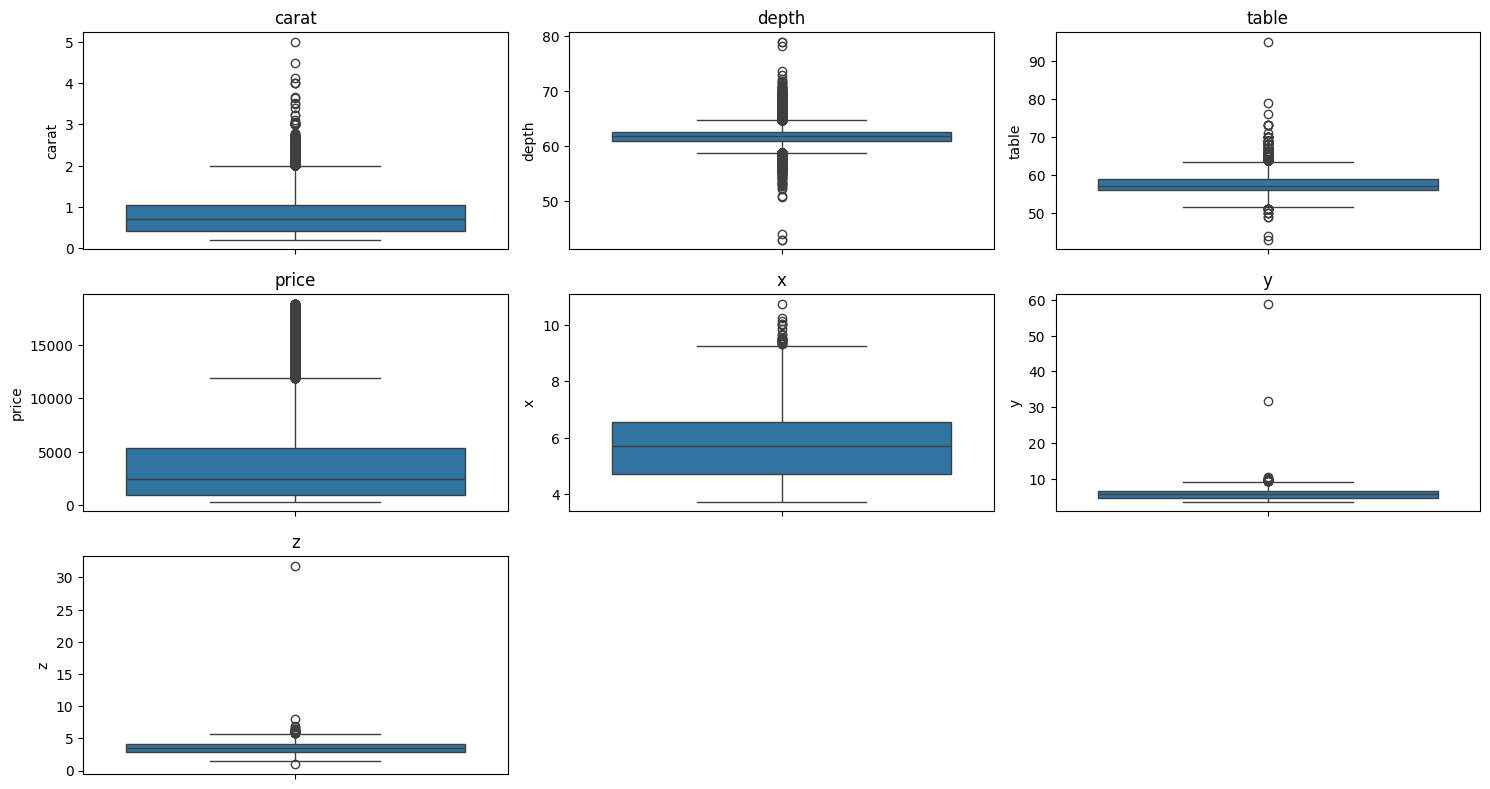

In [28]:
#Visual Outlier Detection (Boxplots)
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [29]:
#IQR Method
#Define IQR boundaries
def iqr_bounds(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

In [30]:
#Check outlier count per feature
for col in num_cols:
    lower, upper = iqr_bounds(df_clean, col)
    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")

carat: 1883 outliers
depth: 2543 outliers
table: 604 outliers
price: 3532 outliers
x: 24 outliers
y: 22 outliers
z: 29 outliers


In [31]:
#Final Dataset for Next Step
df_outliers = df_clean.copy()

In [32]:
#Skewness Analysis & Transformation
#Check Skewness Numerically
df_outliers[num_cols].skew().sort_values(ascending=False)

y        2.462211
price    1.618349
z        1.585490
carat    1.116207
table    0.796799
x        0.398348
depth   -0.081726
dtype: float64

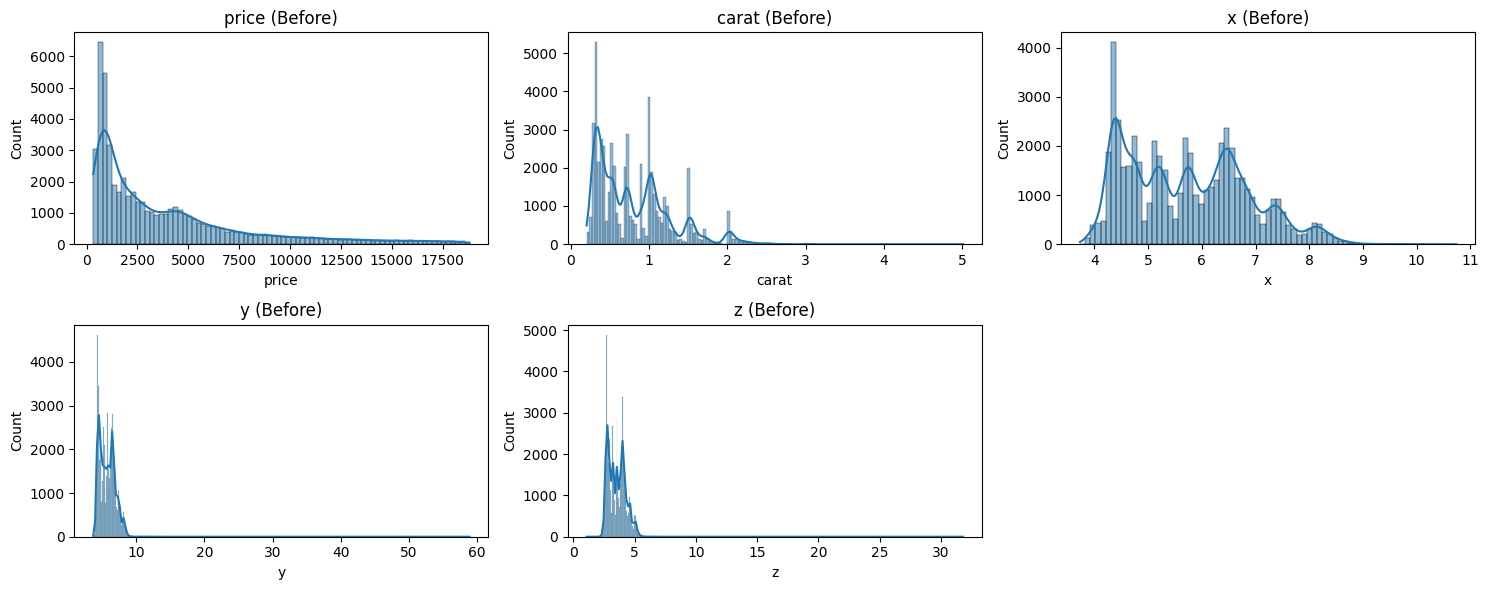

In [33]:
#Visualize Skewness (Before)
plt.figure(figsize=(15, 6))
for i, col in enumerate(['price', 'carat', 'x', 'y', 'z'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_outliers[col], kde=True)
    plt.title(f"{col} (Before)")

plt.tight_layout()
plt.show()

In [34]:
#Apply Log Transformation(Only on positive, right-skewed variables,Never log categorical data)
df_skew = df_outliers.copy()

df_skew['price_log'] = np.log1p(df_skew['price'])
df_skew['carat_log'] = np.log1p(df_skew['carat'])
df_skew['x_log'] = np.log1p(df_skew['x'])
df_skew['y_log'] = np.log1p(df_skew['y'])
df_skew['z_log'] = np.log1p(df_skew['z'])

In [35]:
#Re-check Skewness (After)
df_skew[['price_log', 'carat_log', 'x_log', 'y_log', 'z_log']].skew()

price_log    0.116091
carat_log    0.580594
x_log        0.145526
y_log        0.203023
z_log        0.199937
dtype: float64

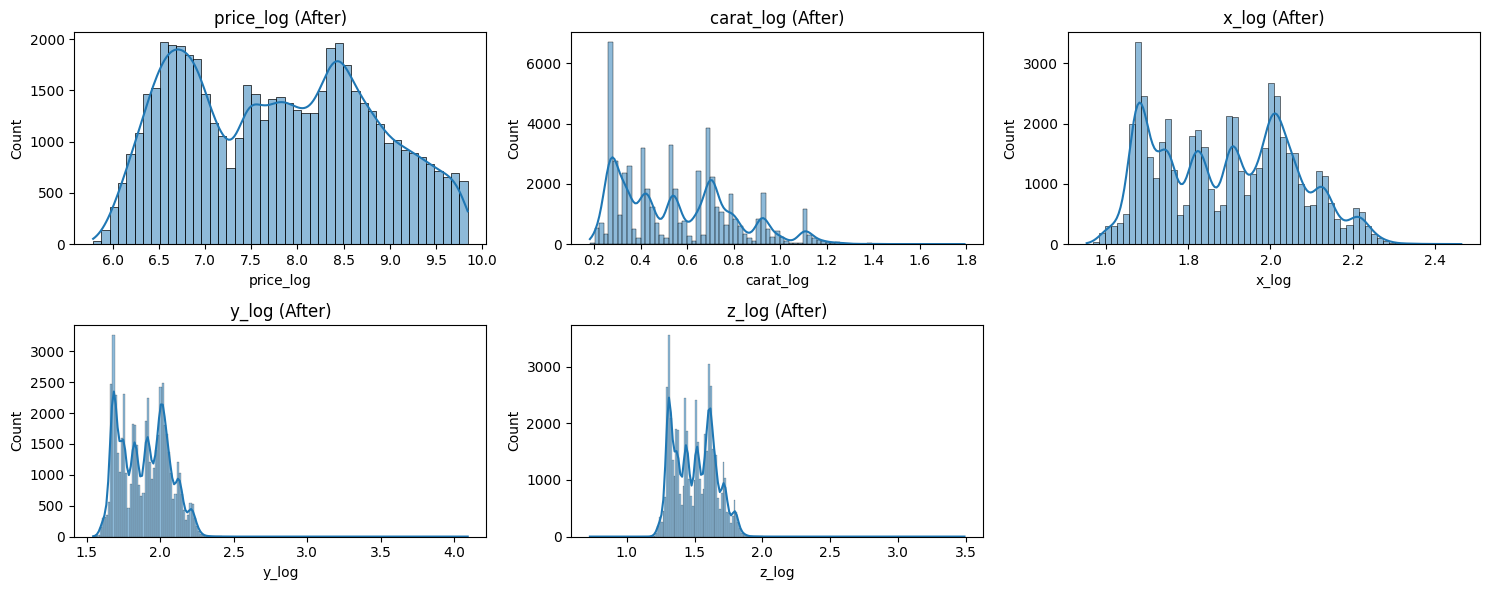

In [36]:
#Visualize After Transformation
plt.figure(figsize=(15, 6))
for i, col in enumerate(['price_log', 'carat_log', 'x_log', 'y_log', 'z_log'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_skew[col], kde=True)
    plt.title(f"{col} (After)")

plt.tight_layout()
plt.show()

In [37]:
#Final Dataset for Next Step
df_model = df_skew.copy()

In [38]:
#Log transformation was applied to right-skewed numerical features to stabilize variance and improve model learning while retaining original values for interpretability.

In [39]:
#Exploratory Data Analysis (EDA)

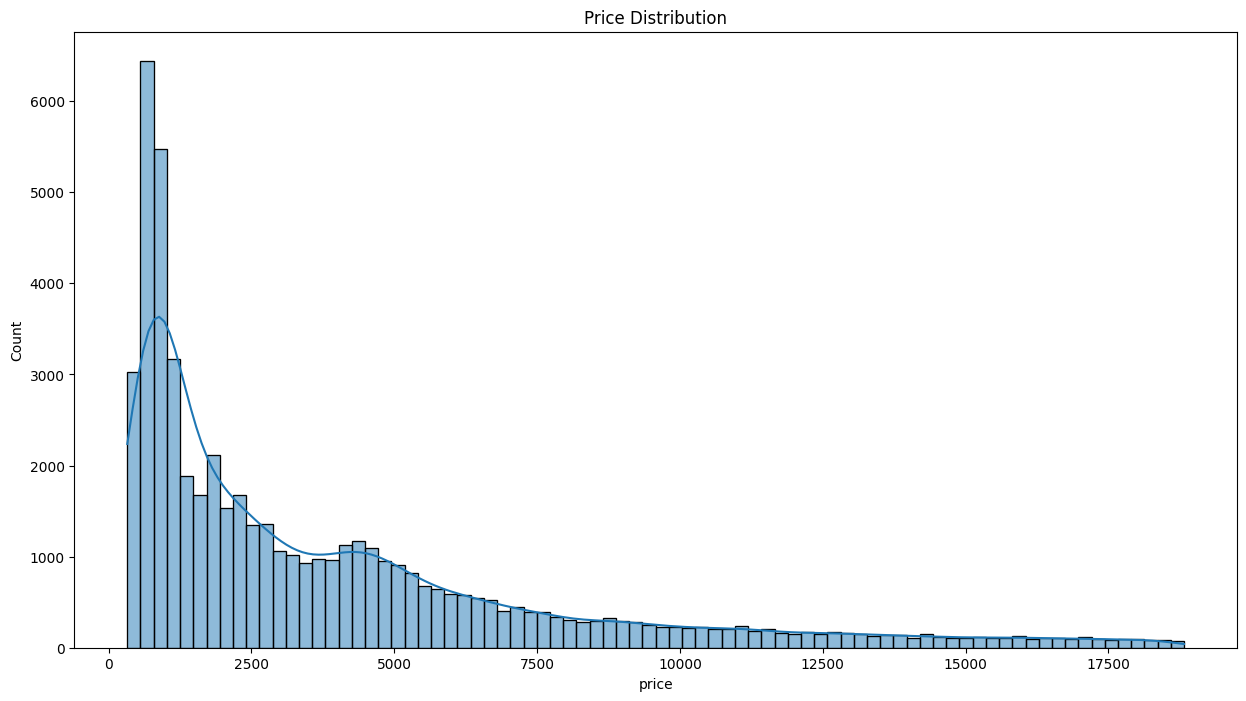

In [40]:
#Distribution Checks (All Key Features)
plt.figure(figsize=(15, 8))
sns.histplot(df_model['price'], kde=True)
plt.title("Price Distribution")
plt.show()

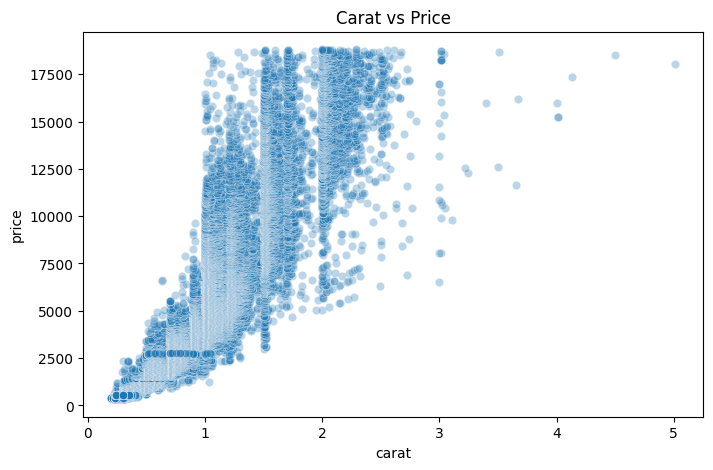

In [41]:
#Price vs Carat (MOST IMPORTANT RELATION)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='carat', y='price', data=df_model, alpha=0.3)
plt.title("Carat vs Price")
plt.show()

In [42]:
#Categorical vs Price (Boxplots)

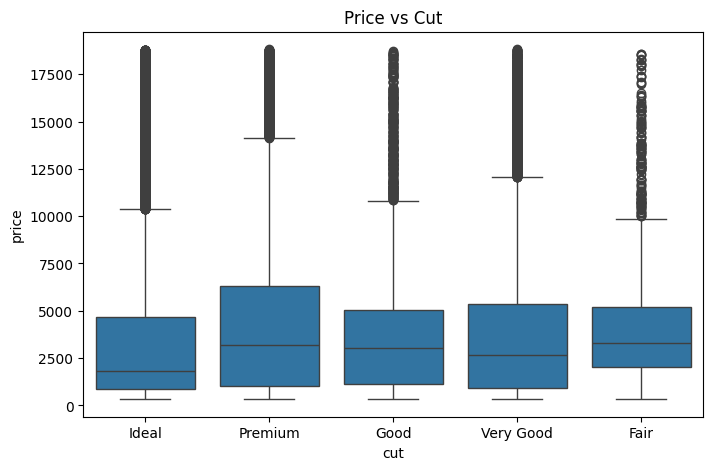

In [43]:
#Price vs Cut
plt.figure(figsize=(8, 5))
sns.boxplot(x='cut', y='price', data=df_model)
plt.title("Price vs Cut")
plt.show()

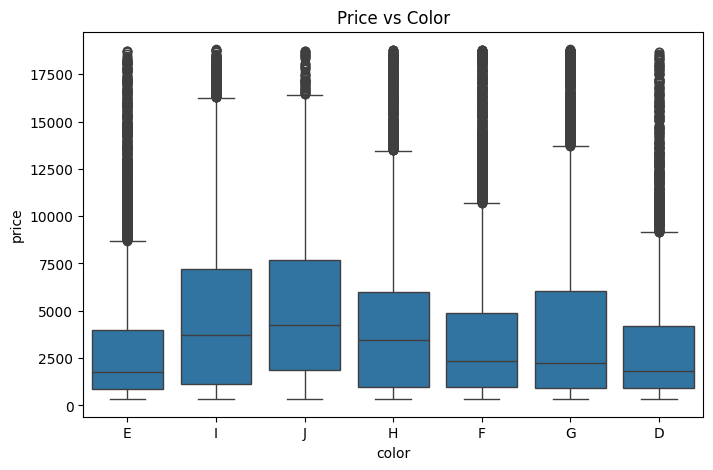

In [44]:
#Price vs Color
plt.figure(figsize=(8, 5))
sns.boxplot(x='color', y='price', data=df_model)
plt.title("Price vs Color")
plt.show()

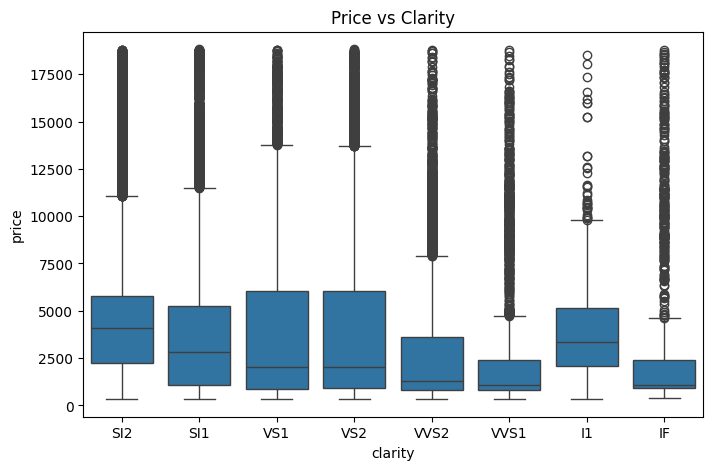

In [46]:
#Price vs Clarity
plt.figure(figsize=(8, 5))
sns.boxplot(x='clarity', y='price', data=df_model)
plt.title("Price vs Clarity")
plt.show()

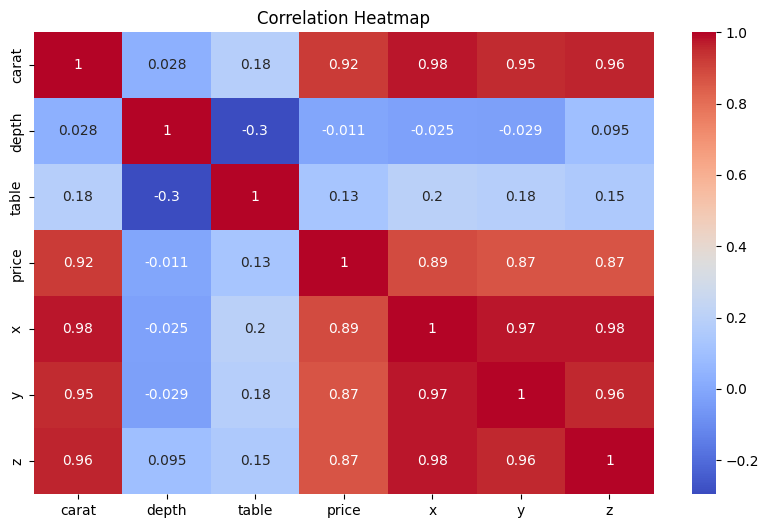

In [47]:
#Correlation Heatmap (Numerical)
plt.figure(figsize=(10, 6))
sns.heatmap(df_model[['carat','depth','table','price','x','y','z']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

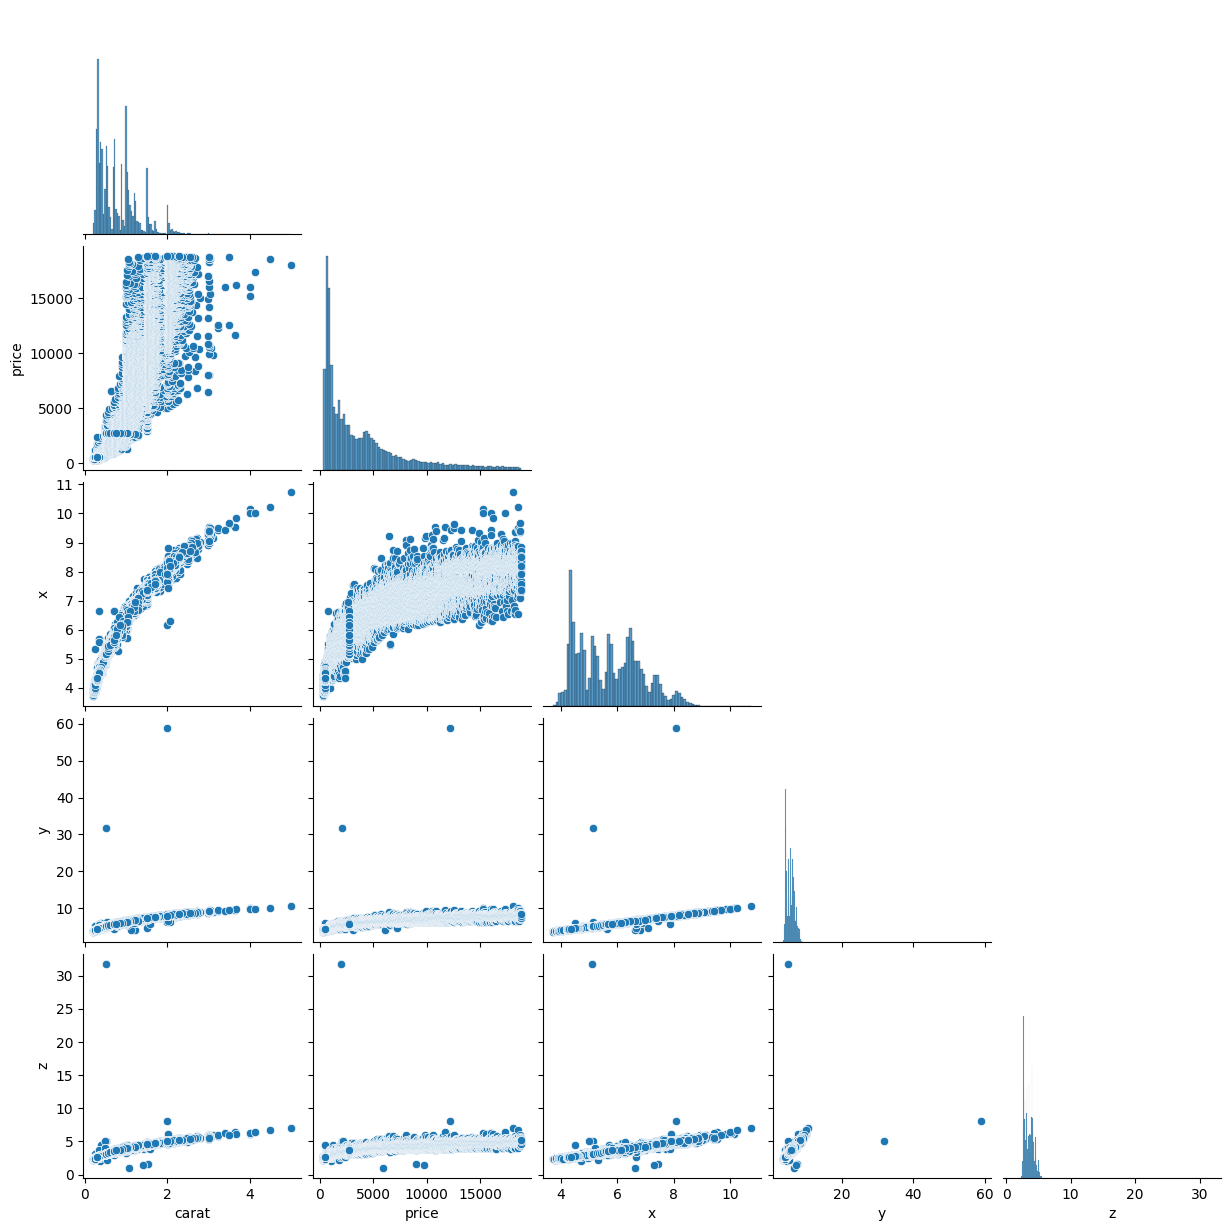

In [48]:
#Pairplot(optional)
sns.pairplot(df_model[['carat','price','x','y','z']], corner=True)
plt.show()

In [49]:
###STEP 5 – EDA (FINAL SUMMARY)
#1. Price Distribution
#Highly right-skewed
#Majority of diamonds lie in lower price range
#Few high-value luxury diamonds create a long tail

#2. Carat vs Price
#Strong non-linear, exponential relationship
#Larger carat → disproportionately higher price
#Confirms carat is the strongest predictor

#3. Price vs Cut
#Premium & Ideal cuts generally have higher median prices
#Overlap exists → cut alone is not sufficient

#4. Price vs Color
#Better color grades (D, E, F) tend to be priced higher
#Effect is moderate compared to carat

#5. Price vs Clarity
#Higher clarity grades (IF, VVS) show higher prices
#But small diamonds with high clarity can still be cheaper

#6. Correlation Heatmap
#carat, x, y, z → very high correlation with price
#x, y, z are highly correlated among themselves
#⚠️ Indicates multicollinearity

#7. Pairplot
#Confirms strong linear relationships among dimensions
#Justifies dimensional reduction or feature engineering

In [50]:
#Feature Engineering

In [51]:
#Create Volume Feature
df_fe = df_model.copy()

df_fe['volume'] = df_fe['x'] * df_fe['y'] * df_fe['z']

In [52]:
#Price per Carat
df_fe['price_per_carat'] = df_fe['price'] / df_fe['carat']

In [53]:
#Dimension Ratio (Shape Consistency)
df_fe['dimension_ratio'] = (df_fe['x'] + df_fe['y']) / (2 * df_fe['z'])

In [54]:
#Carat Category (Optional)
df_fe['carat_category'] = pd.cut(
    df_fe['carat'],
    bins=[0, 0.5, 1.5, df_fe['carat'].max()],
    labels=['Light', 'Medium', 'Heavy']
)

In [56]:
#Check New Features
df_fe[['volume', 'price_per_carat', 'dimension_ratio']].describe()

,volume,price_per_carat,dimension_ratio
count,53920.000000,53920.000000,53920.000000
mean,129.897567,4007.833685,1.620536
std,78.219789,2012.176020,0.050089
min,31.707984,1051.162791,0.161478
25%,65.189759,2477.666667,1.599345
50%,114.840180,3494.633257,1.617021
75%,170.846415,4949.019608,1.638191
max,3840.598060,17828.846154,6.210280


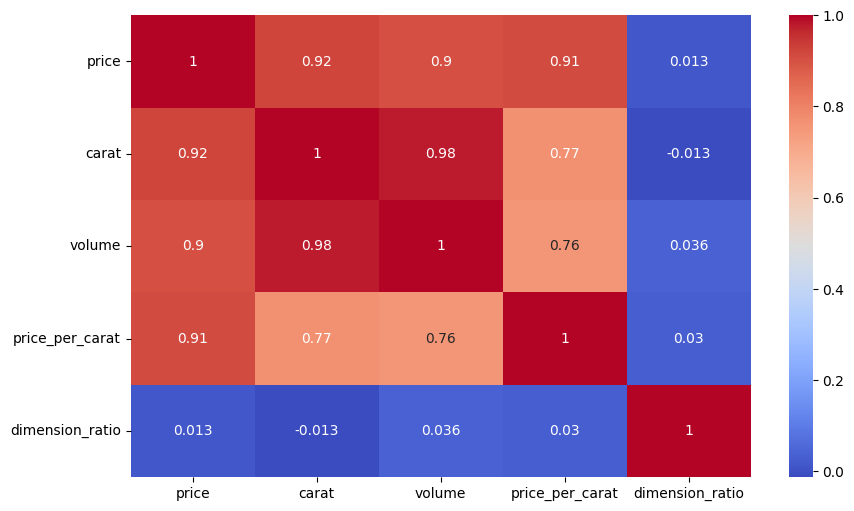

In [57]:
#check correlations
plt.figure(figsize=(10, 6))
sns.heatmap(
    df_fe[['price','carat','volume','price_per_carat','dimension_ratio']].corr(),
    annot=True, cmap='coolwarm'
)
plt.show()

In [58]:
#Regression Feature Set
regression_features = [
    'carat_log',
    'depth',
    'table',
    'dimension_ratio',
    'cut',
    'color',
    'clarity'
]

In [59]:
#Clustering Feature Set
cluster_features = [
    'carat_log',
    'volume',
    'dimension_ratio',
    'cut',
    'color',
    'clarity'
]

In [60]:
#Encoding Categorical Variables

In [61]:
#Understand the Nature of Each Categorical Featur

In [65]:
# Cut (Ordinal): Fair < Good < Very Good < Premium < Ideal
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

# Color (Ordinal): J < I < H < G < F < E < D
color_map = {
    'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7
}

# Clarity (Ordinal): I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF
clarity_map = {
    'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4,
    'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8
}

In [66]:
df_encoded = df_fe.copy()

df_encoded['cut_enc'] = df_encoded['cut'].map(cut_map)
df_encoded['color_enc'] = df_encoded['color'].map(color_map)
df_encoded['clarity_enc'] = df_encoded['clarity'].map(clarity_map)

In [67]:
df_encoded[['cut', 'cut_enc', 'color', 'color_enc', 'clarity', 'clarity_enc']].head(10)

,cut,cut_enc,color,color_enc,clarity,clarity_enc
0,Ideal,5,E,6,SI2,2
1,Premium,4,E,6,SI1,3
2,Good,2,E,6,VS1,5
3,Premium,4,I,2,VS2,4
4,Good,2,J,1,SI2,2
5,Very Good,3,J,1,VVS2,6
6,Very Good,3,I,2,VVS1,7
7,Very Good,3,H,3,SI1,3
8,Fair,1,E,6,VS2,4
9,Very Good,3,H,3,VS1,5


In [68]:
df_encoded[['cut_enc', 'color_enc', 'clarity_enc']].isnull().sum()

cut_enc        0
color_enc      0
clarity_enc    0
dtype: int64

In [69]:
#Prepare Final Regression Dataset
# Feature set (as decided)
X = df_encoded[
    [
        'carat_log',
        'depth',
        'table',
        'dimension_ratio',
        'cut_enc',
        'color_enc',
        'clarity_enc'
    ]
]

y = df_encoded['price_log']

In [70]:
#Train–Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [71]:
#Scale Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
#Model 1: Linear Regression (Baseline)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2:", r2_score(y_test, y_pred_lr))

Linear Regression:
MAE: 0.17340992076413744
RMSE: 0.2179166930870794
R2: 0.9537889969550954


In [73]:
#Model 2: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)

dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("Decision Tree:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2:", r2_score(y_test, y_pred_dt))

Decision Tree:
MAE: 0.08978774323226374
RMSE: 0.11533843315235473
R2: 0.9870546889439431


In [74]:
#Model 3: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2:", r2_score(y_test, y_pred_rf))

Random Forest:
MAE: 0.07637768321490775
RMSE: 0.10083783833050486
R2: 0.9901050990796832


In [75]:
#Model Comparison Table
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_dt),
        mean_absolute_error(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ]
})

results

,Model,MAE,RMSE,R2
0,Linear Regression,0.173410,0.217917,0.953789
1,Decision Tree,0.089788,0.115338,0.987055
2,Random Forest,0.076378,0.100838,0.990105


In [76]:
#Among all regression models, Random Forest achieved the best performance with the lowest RMSE and highest R² score. 
#This indicates its ability to capture non-linear relationships between diamond attributes and price. 
#Hence, Random Forest was selected as the final price prediction model.

In [87]:
#ANN Regression
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/332.0 MB 8.3 MB/s eta 0:00:41
   ---------------------------------------- 3.9/332.0 MB 12.7 MB/s eta 0:00:26
    --------------------------------------- 5.2/332.0 MB 10.3 MB/s eta 0:00:32
    --------------------------------------- 6.3/332.0 MB 8.4 MB/s eta 0:00:39
    --------------------------------------- 7.3/332.0 MB 7.7 MB/s eta 0:00:43
    --------------------------------------- 8.1/332.0 MB 7.2 MB/s eta 0:00:45
   - -------------------------------------- 8.9/332.0 MB 6.5 MB/s eta 0:00:50
   - -------------------------------------- 9.4/332.0 MB 5.9 MB/s eta 0:00:56
   - -------------------------------------- 9.7/332.0 MB 5.6 MB/s eta 0:00:58
   - -------------------------------------- 10.2/332.0 MB 5.2 MB/s eta 0:01:02
   - -------------------------------------- 10.7/332.0 MB 4.9 MB/s eta 0:01:06
   - -------------------------------------- 11.3/332.0 MB 4.7 MB/s 

In [90]:
#ANN Using Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

ann = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

ann.compile(
    optimizer='adam',
    loss='mse'
)

In [91]:
#Train the ANN
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = ann.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 4.1786 - val_loss: 0.1388
Epoch 2/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0673 - val_loss: 0.0296
Epoch 3/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0659 - val_loss: 0.0360
Epoch 4/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0835 - val_loss: 0.1307
Epoch 5/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0351 - val_loss: 0.0478
Epoch 6/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0756 - val_loss: 0.0219
Epoch 7/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0388 - val_loss: 0.1495
Epoch 8/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.1245 - val_loss: 0.0199
Epoch 9/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0162 - val_loss: 0.0157
Epoch 10/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0156 - val_loss: 0.0181
Epoch 11/50
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0450 - val_loss: 0.0687
Epoch 12/50
1079/1079 ━━━━━

In [92]:
#Evaluate ANN
y_pred_ann = ann.predict(X_test_scaled).flatten()

print("ANN Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_ann))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ann)))
print("R2:", r2_score(y_test, y_pred_ann))

337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
ANN Regression:
MAE: 0.09050003305308316
RMSE: 0.11599368124896837
R2: 0.9869071841649786


In [93]:
#| Model             | MAE        | RMSE       | R²         |
#| ----------------- | ---------- | ---------- | ---------- |
#| Linear Regression | 0.1734     | 0.2179     | 0.9538     |
#| Decision Tree     | 0.0898     | 0.1153     | 0.9871     |
#| ANN               | 0.0905     | 0.1159     | 0.9870     |
#| 🏆 Random Forest  | **0.0764** | **0.1008** | **0.9901** |

In [94]:
#Multiple regression models including Linear Regression, Decision Tree, Random Forest, and Artificial Neural Network (ANN) were evaluated. 
#Random Forest achieved the best performance with the lowest RMSE and highest R² score. Hence, Random Forest was selected as the final model for diamond price prediction.

In [95]:
#Save Random Forest Model
import pickle

with open("rf_price_model.pkl", "wb") as f:
    pickle.dump(rf, f)

In [96]:
#Save Scaler
with open("scaler_reg.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [97]:
#Clustering

In [98]:
#Prepare Clustering Dataset
cluster_features = [
    'carat_log',
    'volume',
    'dimension_ratio',
    'cut_enc',
    'color_enc',
    'clarity_enc'
]

In [99]:
X_cluster = df_encoded[cluster_features]

In [100]:
#Scale Features (Mandatory for KMeans)
from sklearn.preprocessing import StandardScaler

scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

In [101]:
#Find Optimal Number of Clusters (Elbow Method)
from sklearn.cluster import KMeans

inertia = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)

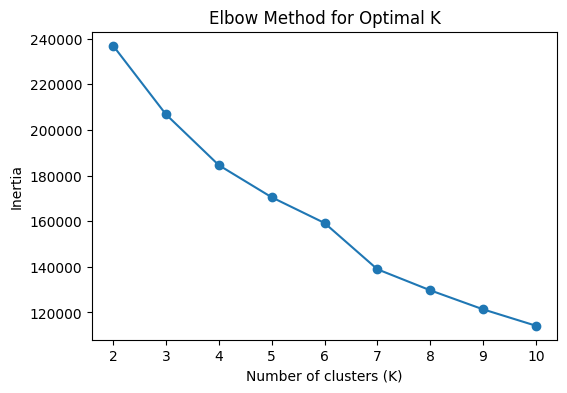

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [103]:
#Validate with Silhouette Score
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.267
K=3, Silhouette Score=0.234
K=4, Silhouette Score=0.207
K=5, Silhouette Score=0.192
K=6, Silhouette Score=0.196


In [104]:
#We choose K = 3
#Although K=2 achieved the highest silhouette score, K=3 was selected as it provides more meaningful and interpretable market segments while maintaining acceptable cluster separation.

In [105]:
#Fit Final KMeans Model
#Train Final KMeans (K = 3)
final_k = 3

kmeans_final = KMeans(
    n_clusters=final_k,
    random_state=42,
    n_init=10
)

cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

df_encoded['cluster'] = cluster_labels

In [106]:
#Inspect Cluster Distribution
df_encoded['cluster'].value_counts()

cluster
1    24256
0    16151
2    13513
Name: count, dtype: int64

In [107]:
#Analyze Cluster Characteristics (VERY IMPORTANT)
cluster_summary = df_encoded.groupby('cluster')[
    ['price', 'carat', 'volume', 'cut_enc', 'color_enc', 'clarity_enc']
].mean()

cluster_summary

,price,carat,volume,cut_enc,color_enc,clarity_enc
cluster,,,,,,
0,8210.664417,1.351446,219.955652,4.082534,3.437125,3.363816
1,1552.672246,0.456069,74.987473,4.505030,4.769789,4.906745
2,3084.962333,0.749076,120.822685,2.612669,4.910901,3.338267


In [108]:
#Final Cluster Mapping
cluster_name_map = {
    0: "Premium Heavy Diamonds",
    1: "Affordable Small High-Quality Diamonds",
    2: "Mid-range Balanced Diamonds"
}

df_encoded['cluster_name'] = df_encoded['cluster'].map(cluster_name_map)

In [109]:
#KMeans clustering segmented diamonds into three meaningful market groups: Premium Heavy Diamonds, Affordable Small High-Quality Diamonds, and Mid-range Balanced Diamonds. 
#These segments are based on physical size, quality attributes, and market pricing characteristics, enabling targeted pricing and inventory strategies.

In [110]:
#PCA Visualization (2D Clusters)
#Apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

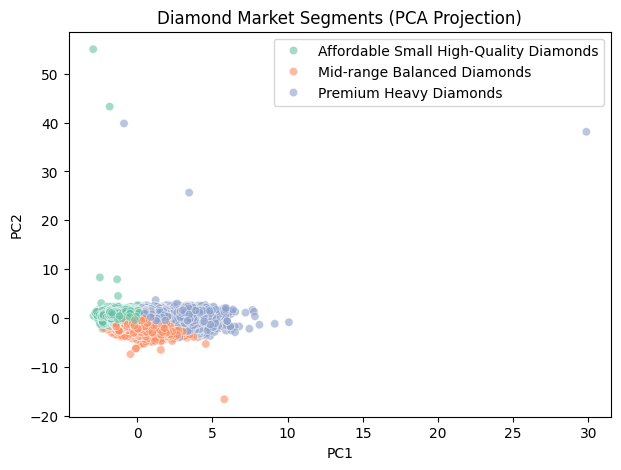

In [111]:
#Plot Clusters in 2D
plt.figure(figsize=(7,5))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=df_encoded['cluster_name'],
    palette='Set2',
    alpha=0.6
)
plt.title("Diamond Market Segments (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

In [112]:
#Save Clustering Model & Scaler
with open("kmeans_cluster_model.pkl", "wb") as f:
    pickle.dump(kmeans_final, f)

with open("scaler_cluster.pkl", "wb") as f:
    pickle.dump(scaler_cluster, f)